In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# Replace with your actual file path if needed
df = pd.read_csv("NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Coefficients (with TYPE and SUBLOCALITY): [ 3.19150467e-01  1.42365533e-03  2.48204153e-01  3.35772277e-01
  5.29778896e-01  1.77929508e-01  3.49341389e-01 -3.49341555e-01
  1.20879062e-01  3.54299803e-01 -2.79910840e-01  5.22389804e-01
  2.92725244e-01  2.46617603e-01  4.56429244e-01  2.51782935e-01
  9.00951096e-01  6.61876186e-03  1.08637587e-03  1.10720947e-01
  9.71445147e-17  7.21795528e-01  3.17843706e-01  8.94717274e-01
  6.53627682e-01  6.75271326e-01 -4.66134627e-02  2.15134870e-01
 -1.52664723e-01  2.76158492e-02 -8.69181349e-02  2.58317435e-01
 -3.22836972e-01 -2.98778235e-01]
Intercept (with TYPE and SUBLOCALITY): 10.12397146854554
Mean Squared Error (log-transformed, with TYPE and SUBLOCALITY): 0.20824732273615143
R2 Score (log-transformed, with TYPE and SUBLOCALITY): 0.5716865149524835


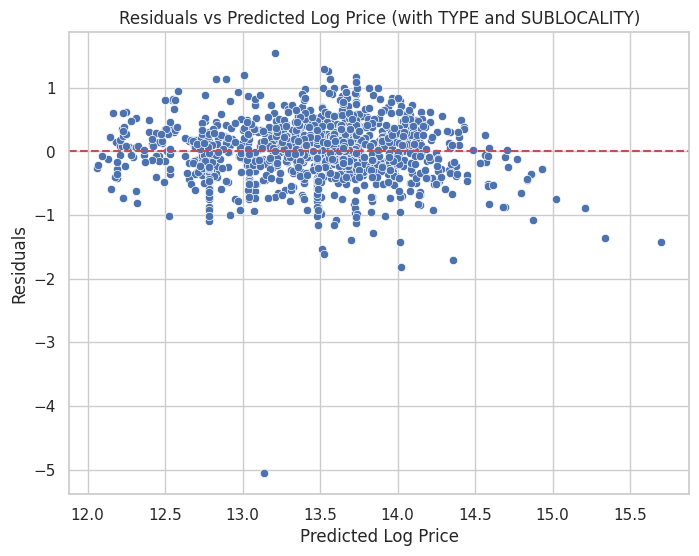

In [65]:
# Include 'TYPE' and 'SUBLOCALITY' features using one-hot encoding
df_model_with_categorical = pd.get_dummies(df_model_clean, columns=['TYPE', 'SUBLOCALITY'], drop_first=True)

# Define features (X) and target (y)
features = ['LOG_SQFT', 'BEDS', 'BATH'] + [col for col in df_model_with_categorical.columns if col.startswith(('TYPE_', 'SUBLOCALITY_'))]
X = df_model_with_categorical[features]
y = df_model_with_categorical['LOG_PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model_with_categorical = LinearRegression()
model_with_categorical.fit(X_train, y_train)

# Predict
y_pred_with_categorical = model_with_categorical.predict(X_test)

# Evaluate
mse_with_categorical = mean_squared_error(y_test, y_pred_with_categorical)
r2_with_categorical = r2_score(y_test, y_pred_with_categorical)

print("Coefficients (with TYPE and SUBLOCALITY):", model_with_categorical.coef_)
print("Intercept (with TYPE and SUBLOCALITY):", model_with_categorical.intercept_)
print("Mean Squared Error (log-transformed, with TYPE and SUBLOCALITY):", mse_with_categorical)
print("R2 Score (log-transformed, with TYPE and SUBLOCALITY):", r2_with_categorical)

# Visualize residuals
residuals_with_categorical = y_test - y_pred_with_categorical

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_with_categorical, y=residuals_with_categorical)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Log Price (with TYPE and SUBLOCALITY)")
plt.show()

In [66]:
# Drop irrelevant columns and handle missing values
df_model = df[['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH', 'TYPE', 'SUBLOCALITY']].copy() # Include 'TYPE' and 'SUBLOCALITY' here

# Handle missing values - filling with median for numerical columns
df_model['PROPERTYSQFT'].fillna(df_model['PROPERTYSQFT'].median(), inplace=True)
df_model['BEDS'].fillna(df_model['BEDS'].median(), inplace=True)
df_model['BATH'].fillna(df_model['BATH'].median(), inplace=True)

# Remove outliers using IQR - applied to PRICE and PROPERTYSQFT
Q1 = df_model[['PRICE', 'PROPERTYSQFT']].quantile(0.25)
Q3 = df_model[['PRICE', 'PROPERTYSQFT']].quantile(0.75)
IQR = Q3 - Q1

df_model_clean = df_model[~((df_model[['PRICE', 'PROPERTYSQFT']] < (Q1 - 1.5 * IQR)) |(df_model[['PRICE', 'PROPERTYSQFT']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Log transform skewed features (PRICE and PROPERTYSQFT) - applied after outlier removal
df_model_clean['LOG_PRICE'] = np.log(df_model_clean['PRICE'])
df_model_clean['LOG_SQFT'] = np.log(df_model_clean['PROPERTYSQFT'])

display(df_model_clean.head())

<ipython-input-66-1970998974>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['PROPERTYSQFT'].fillna(df_model['PROPERTYSQFT'].median(), inplace=True)
<ipython-input-66-1970998974>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,PRICE,PROPERTYSQFT,BEDS,BATH,TYPE,SUBLOCALITY,LOG_PRICE,LOG_SQFT
0,315000,1400.000000,2,2.0,Condo for sale,Manhattan,12.660328,7.244228
2,260000,2015.000000,4,2.0,House for sale,Richmond County,12.468437,7.608374
3,69000,445.000000,3,1.0,Condo for sale,New York County,11.141862,6.098074
6,899500,2184.207862,2,2.0,Condo for sale,New York,13.709594,7.689009
8,265000,750.000000,1,1.0,Co-op for sale,East Bronx,12.487485,6.620073


Coefficients (with TYPE): [ 0.37915499  0.00149652  0.252499    0.38279875  0.57860974  0.75361114
  0.1637012  -0.30339087 -0.18406793  0.28316144 -0.36066031  0.4653411
  0.21778004  0.24364483  0.42247128]
Intercept (with TYPE): 9.921458076218311
Mean Squared Error (log-transformed, with TYPE): 0.2603794562278368
R2 Score (log-transformed, with TYPE): 0.43513782021370273


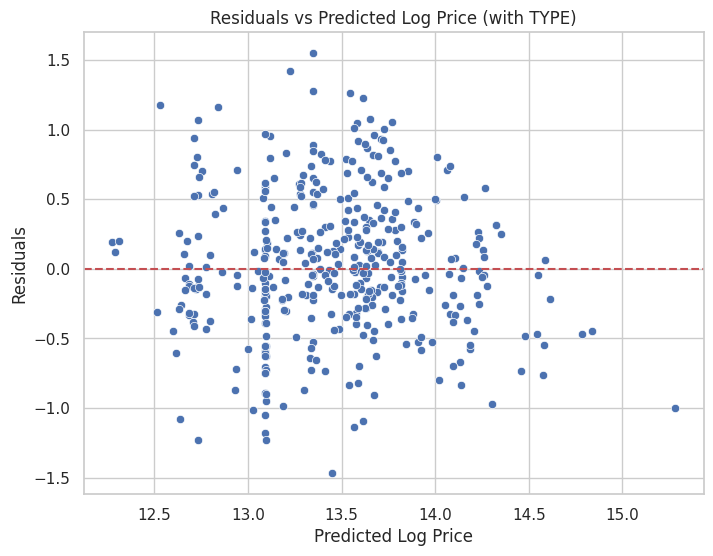

In [71]:
# Include 'TYPE' feature using one-hot encoding
df_model_with_type = pd.get_dummies(df_model_clean, columns=['TYPE','SUBLOCALITY'], drop_first=True)

# Define features (X) and target (y)
features = ['LOG_SQFT', 'BEDS', 'BATH'] + [col for col in df_model_with_type.columns if col.startswith('TYPE_')]
X = df_model_with_type[features]
y = df_model_with_type['LOG_PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train model
model_with_type = LinearRegression()
model_with_type.fit(X_train, y_train)

# Predict
y_pred_with_type = model_with_type.predict(X_test)

# Evaluate
mse_with_type = mean_squared_error(y_test, y_pred_with_type)
r2_with_type = r2_score(y_test, y_pred_with_type)

print("Coefficients (with TYPE):", model_with_type.coef_)
print("Intercept (with TYPE):", model_with_type.intercept_)
print("Mean Squared Error (log-transformed, with TYPE):", mse_with_type)
print("R2 Score (log-transformed, with TYPE):", r2_with_type)

# Visualize residuals
residuals_with_type = y_test - y_pred_with_type

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_with_type, y=residuals_with_type)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Log Price (with TYPE)")
plt.show()

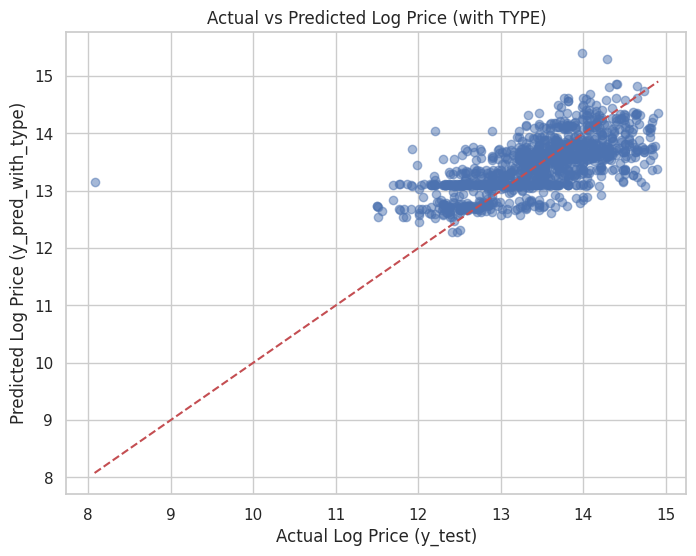

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_with_type, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Add a red dashed line for perfect prediction
plt.xlabel("Actual Log Price (y_test)")
plt.ylabel("Predicted Log Price (y_pred_with_type)")
plt.title("Actual vs Predicted Log Price (with TYPE)")
plt.show()